# Car Price Prediction with K-NN Algorithm

<br>The project uses the data set from https://archive.ics.uci.edu/ml/datasets/automobile 
<br>This data set consists of three types of entities: 
<br>- the specification of an auto in terms of various characteristics
<br>- its assigned insurance risk rating
<br>- its normalized losses in use as compared to other cars. 
<br>
<br>About project
<br>
<br>**Techniques used:**
<br>K-Nearest Neighbors Algorithm
<br>Data Normalization, Visualization
<br>Data cleaning, Descriptive Statistics
<br>
<br>**Libraries used:**
<br>Pandas, NumPy, Scikit-learn,
<br>Math, Matplotlib, Plotly

## 1. Setup

In [1]:
!python3 -m pip install scipy
!python3 -m pip install sklearn
!python3 -m pip install plotly

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly import graph_objs as go
init_notebook_mode(connected=True)
pd.options.display.max_columns = 30
%matplotlib inline

## 2. Initial Observation of Data

In [3]:
header_list = ["symboling", "normalized_losses", "make", 
               "fuel_type","aspiration", "num_doors", 
               "body_style","drive_wheels", "engine_location", 
               "wheel_base", "length", "width", "height", 
               "curb_weight", "engine_type", "num_cylinders",
               "engine_size", "fuel_system","bore", "stroke", 
               "compression_ratio", "horsepower", "peak_rpm", 
               "city_mpg", "highway_mpg", "price"]

In [4]:
cars = pd.read_csv("data/imports-85.data", names=header_list)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [8]:
# table = ff.create_table(cars.head())
# iplot(table, filename='jupyter')
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# table = ff.create_table(cars.tail())
# iplot(table, filename='jupyter')
cars.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 3. Data Cleaning

- Replacing all "?" values to numpy nan to calculate the sum of null values

In [10]:
cars = cars.replace("?", np.nan)

In [11]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

- Changing the ordinal data in to float and int

In [13]:
cars["bore"] = cars["bore"].astype("float")

In [14]:
cars["stroke"] = cars["stroke"].astype("float")

In [15]:
cars["horsepower"] = cars["horsepower"].astype("float")

In [16]:
cars["peak_rpm"] = cars["peak_rpm"].astype("float")

In [17]:
cars["price"] = cars["price"].astype("float")

In [18]:
cars["normalized_losses"] = cars["normalized_losses"].astype("float") 

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

- Handling missing values for cars["normalized_losses"] column

In [20]:
null_rows_normalized_losses = cars[cars["normalized_losses"].isna()]
null_rows_normalized_losses.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


> The rows with null values in column normalized-losses contain data on other columns, therefore, it was decided not to remove them but replace with the mean

In [21]:
cars["normalized_losses"].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

- Replacing the NaN values with the Average in normalized_losses

In [22]:
replacement = cars["normalized_losses"].mean()
cars["normalized_losses"][cars["normalized_losses"].isna()] = replacement

In [23]:
cars["normalized_losses"].head()

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized_losses, dtype: float64

> The missing values in normalized_losses are now properly handled. The rest of missing values in other columns shall be observed

In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [25]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [26]:
cars[cars["num_doors"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [27]:
cars["num_doors"].describe()

count      203
unique       2
top       four
freq       114
Name: num_doors, dtype: object

In [28]:
cars["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

In [29]:
cars[cars["bore"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [30]:
cars["bore"].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [31]:
cars["bore"].describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [32]:
cars[cars["stroke"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [33]:
cars["stroke"].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [34]:
cars["stroke"].describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [35]:
cars["horsepower"].head()

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64

In [36]:
cars[cars["horsepower"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [37]:
cars["horsepower"].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [38]:
cars["peak_rpm"].head()

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak_rpm, dtype: float64

In [39]:
cars[cars["peak_rpm"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [40]:
cars["peak_rpm"].describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [41]:
cars["price"].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [42]:
cars[cars["price"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [43]:
cars["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

> It was decided to drop the rest of null values since there were only a few rows and no major data would be lost

In [45]:
cars = cars.dropna()
cars = cars.reset_index(drop=True)

In [46]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

- Normalizing the numeric columns to range from 0 to 1 except the price column

In [47]:
ordinal = ['normalized_losses', 'wheel_base', 'length', 
           'width', 'height', 'curb_weight', 'engine_size', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 
           'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
ordinal_cars = cars[ordinal]

In [48]:
price = ordinal_cars['price']
ordinal_cars = (ordinal_cars - ordinal_cars.min())/(ordinal_cars.max() - ordinal_cars.min())
ordinal_cars['price'] = price

## 4. Univariate K-NN Model

- Creating a univariate knn model

In [49]:
def knn_train_test(train_column, target, df, k_values):
    # shuffle the rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # divide the df into train and test (50/50)
    last_train_row = int(len(df)/2)
    train = df.iloc[0:last_train_row]
    test = df.iloc[last_train_row:]
    
    # instantiate a dictionary of k:rmse values
    k_rmse = {}
    
    # knn model for each k value
    for k in k_values:
        
        #instantiate and fit the knn model for each k
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train[[train_column]], train[target])
        
        # calculate prefictions
        predictions = model.predict(test[[train_column]])
        
        # find sqrt mean squared error for model preditions
        mse = mean_squared_error(test[target], predictions)
        rmse = math.sqrt(mse)
        k_rmse[k]=rmse
        
    return k_rmse

- Using the univariate knn model to predict prices for our dataframe
- Calculating the RMSE value for each iteration to understand the model performance

In [50]:
k_values = [1,3,5,7,9]
rmse_results = {}
for column in ordinal:
    if column != 'price':
        iteration_k_rmse = knn_train_test(column, "price", 
                                            ordinal_cars, k_values)
        rmse_results[column] = iteration_k_rmse
rmse_results

{'normalized_losses': {1: 7844.319554176846,
  3: 7746.57568261065,
  5: 7701.50819148465,
  7: 7849.466195224261,
  9: 8038.003527258046},
 'wheel_base': {1: 6332.1593530299715,
  3: 5691.155680372482,
  5: 5879.6327813307325,
  7: 5933.800412037543,
  9: 6007.526484206682},
 'length': {1: 6258.164657996619,
  3: 5764.587398219127,
  5: 5823.219231148748,
  7: 5855.722064663791,
  9: 5901.629001250215},
 'width': {1: 4996.571385284856,
  3: 4360.62964966996,
  5: 4586.6318629004,
  7: 4425.324583896441,
  9: 4715.982229269832},
 'height': {1: 10889.539460881855,
  3: 8567.789618190958,
  5: 8471.47307870945,
  7: 8137.528220733606,
  9: 8215.912288400235},
 'curb_weight': {1: 5007.487233308995,
  3: 4142.948725351724,
  5: 4277.090667081186,
  7: 4352.41997270106,
  9: 4774.595281788251},
 'engine_size': {1: 3489.2445287545124,
  3: 3117.548910174633,
  5: 3247.858491978603,
  7: 3621.839678193111,
  9: 3934.7415704747746},
 'bore': {1: 7289.379536759479,
  3: 7252.0135214775355,
  5:

- Choosing the best results

In [51]:
# helper method to get key by value in a dictionary
def get_key(dict_obj, val):
    for key, value in dict_obj.items():
         if val == value:
             return key

In [52]:
# choosing minimal error values for each train column
best_values = {}
for column,k_num_rmse in rmse_results.items():
    min_error = min(k_num_rmse.values())
    k_number = get_key(k_num_rmse, min_error)
    best_values[column] = [k_number, min_error]

best_values

{'normalized_losses': [5, 7701.50819148465],
 'wheel_base': [3, 5691.155680372482],
 'length': [3, 5764.587398219127],
 'width': [3, 4360.62964966996],
 'height': [7, 8137.528220733606],
 'curb_weight': [3, 4142.948725351724],
 'engine_size': [3, 3117.548910174633],
 'bore': [9, 7165.445393921243],
 'stroke': [3, 7567.623206793531],
 'compression_ratio': [7, 6533.591537872384],
 'horsepower': [3, 4481.678972224604],
 'peak_rpm': [3, 7422.196486012476],
 'city_mpg': [3, 4295.1437456859785],
 'highway_mpg': [3, 4256.584038115483]}

In [53]:
# choosing only top 3 best k number and train column
sorted_best = sorted(best_values.items(), key=lambda item: item[1][1])
# sorted_3_best = sorted_best[:3]
sorted_best

[('engine_size', [3, 3117.548910174633]),
 ('curb_weight', [3, 4142.948725351724]),
 ('highway_mpg', [3, 4256.584038115483]),
 ('city_mpg', [3, 4295.1437456859785]),
 ('width', [3, 4360.62964966996]),
 ('horsepower', [3, 4481.678972224604]),
 ('wheel_base', [3, 5691.155680372482]),
 ('length', [3, 5764.587398219127]),
 ('compression_ratio', [7, 6533.591537872384]),
 ('bore', [9, 7165.445393921243]),
 ('peak_rpm', [3, 7422.196486012476]),
 ('stroke', [3, 7567.623206793531]),
 ('normalized_losses', [5, 7701.50819148465]),
 ('height', [7, 8137.528220733606])]

- Visualizing the performance results

In [54]:
column_names = [row[0] for row in sorted_best]
column_names

['engine_size',
 'curb_weight',
 'highway_mpg',
 'city_mpg',
 'width',
 'horsepower',
 'wheel_base',
 'length',
 'compression_ratio',
 'bore',
 'peak_rpm',
 'stroke',
 'normalized_losses',
 'height']

In [55]:
k_numbers = [row[1][0] for row in sorted_best]
k_numbers

[3, 3, 3, 3, 3, 3, 3, 3, 7, 9, 3, 3, 5, 7]

In [56]:
rmse_column = [row[1][1] for row in sorted_best]
rmse_column

[3117.548910174633,
 4142.948725351724,
 4256.584038115483,
 4295.1437456859785,
 4360.62964966996,
 4481.678972224604,
 5691.155680372482,
 5764.587398219127,
 6533.591537872384,
 7165.445393921243,
 7422.196486012476,
 7567.623206793531,
 7701.50819148465,
 8137.528220733606]

In [57]:
color1 = 'white'
color2 = 'lightgrey'
header_color = "lightblue"
column_names = [ x.replace("_", " ").title() for x in column_names]

fig = go.Figure(data=[go.Table( 
    header=dict(values=["Parameter", "K Number", "RMSE"], 
                fill_color=header_color), 
    cells=dict(values=[column_names, k_numbers, rmse_column],
              fill_color = [[color1, color2]*10])) ]) 
iplot(fig)

In [58]:
ordinal_cars.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.294686,0.359295,0.495917,0.478101,0.505829,0.416411,0.253299,0.564730,0.561362,0.196477,0.259261,0.387649,0.342401,0.389146,13285.025907
std,0.169333,0.179371,0.186248,0.182718,0.199564,0.204306,0.156945,0.194560,0.150200,0.248593,0.177384,0.191304,0.177440,0.179392,8089.082886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.157068,0.230321,0.376119,0.324786,0.350000,0.254849,0.139623,0.435714,0.495238,0.093750,0.102804,0.265306,0.166667,0.236842,7738.000000
50%,0.298429,0.303207,0.479104,0.435897,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.387755,0.333333,0.368421,10245.000000
75%,0.361257,0.460641,0.649254,0.564103,0.658333,0.567882,0.320755,0.750000,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16515.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


> **Observations:**
    <br>here

## 5. Multivariate K-NN Model

- Creating multivariate k-nn model

In [59]:
def multi_knn_train_test(train_columns, target, df, k_values):
    # shuffle the rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # divide the df into train and test (50/50)
    last_train_row = int(len(df)/2)
    train = df.iloc[0:last_train_row]
    test = df.iloc[last_train_row:]
    
    # instantiate a dictionary of k:rmse values
    k_rmse = {}
    
    # knn model for each k value
    for k in k_values:
        
        #instantiate and fit the knn model for each k
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train[train_columns], train[target])
        
        # calculate prefictions
        predictions = model.predict(test[train_columns])
        
        # find sqrt mean squared error for model preditions
        mse = mean_squared_error(test[target], predictions)
        rmse = math.sqrt(mse)
        k_rmse[k]=rmse
        
    return k_rmse

- Using the multivariate k-nn model to predict prices
- Calculating rmse to evaluate model prediction

In [60]:
multi_rmse_result = multi_knn_train_test(ordinal[:-1], "price", ordinal_cars, [5])
multi_rmse_result

{5: 4436.240598180902}

> **Observations**
<br> The RMSE value of the model is 4436.2 when using all ordinal columns and standard value of k 5

- Training the model on 2,3,4 and 5 best features identified via univariate model evaluation

In [61]:
# creating lists of feature combinations
best_2 = ['engine_size', 'curb_weight']
best_3 = ['engine_size','curb_weight','highway_mpg']
best_4 = ['engine_size','curb_weight','highway_mpg','city_mpg']
best_5 = ['engine_size','curb_weight','highway_mpg','city_mpg','width']

feature_combinations = [best_2, best_3, best_4, best_5]

# calculating rmse values for each combination of features
multi_rmse_results = []
multi_rmse_results_dict = {}
for features_comb in feature_combinations:
    multi_rmse_result = multi_knn_train_test(features_comb, "price", ordinal_cars, [5])
    multi_rmse_results.append(multi_rmse_result)

values = []
for i in multi_rmse_results:
    for key,v in i.items():
        values.append(v)
values

[3379.0992220065023,
 3627.3090820754737,
 3917.8016610412697,
 3638.8989152577346]

- Visualing the evaluation results

In [73]:
color1 = 'white'
color2 = 'lightgrey'
header_color = "lightblue"

def format_feature_names(lst):
    new_lst = []
    for i in lst: 
        i = i.replace("[", " ").replace("]", " ").replace("_", " ").replace("\'", " ").title()
        new_lst.append(i)
    return new_lst
    
feature_combinations = [format_feature_names(x) for x in feature_combinations]

fig = go.Figure(data=[go.Table( 
    header=dict(values=["Parameters","RMSE"], 
                fill_color=header_color), 
    cells=dict(values=[feature_combinations, values],
              fill_color = [[color1, color2]*10])) ]) 
iplot(fig)

- Choosing the best 3 models and optimizing them by varying the k number from 1 to 25

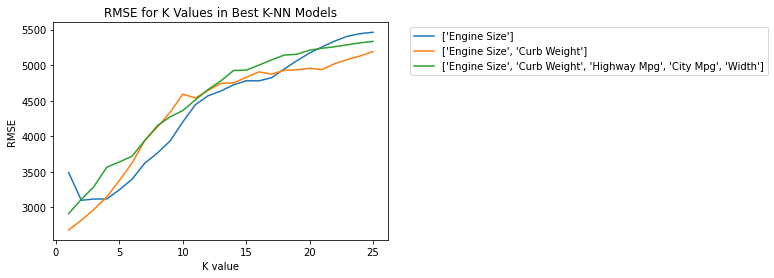

In [75]:
best_1 = ["engine_size"]
best_feature_combinations = [best_1, best_2, best_5]
k_nums = [i for i in range(26)][1:]

for best_feature_combination in best_feature_combinations:
    multi_rmse_result = multi_knn_train_test(best_feature_combination, "price", ordinal_cars, k_nums)
    
    x = list(multi_rmse_result.keys())
    y = list(multi_rmse_result.values())
   
    
    best_feature_combination = format_feature_names(best_feature_combination)
    plt.plot(x,y, label="{}".format(best_feature_combination))
    
    plt.xlabel("K value")
    plt.ylabel("RMSE")
    plt.title("RMSE for K Values in Best K-NN Models")
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


> **Observations:**
<br> 